# Ch5: Support Vector Machines

A Popular ML model, useful for linear and non-linear classification, regression, and outlier detection.

SVM's try to fit the "widest possible street" between the classes. "Large Margin Classification". The instances of the training data located on the edge of the street are the "support vectors". It is a good idea to use feature scaling (`StandardScaler`) with SVM's.

## Linear SVM Classification

In [2]:
# Try out SVM on Iris dataset
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.float64) #Iris-Virginica

In [5]:
# Small C value, wider street but more margin violations ("soft margin classification")
# Reduce C to avoid SVM overfitting.
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Outputs binary classification, not probabilities.

For Larger datasets, a good choice is the `SGDClassifier` which uses Stochastic gradient descent to train a linear SVM.

## Non-linear SVM Classification

A trick for nonlinearly separable data is to add a polynomial feature. Use the `PolynomialFeatures` transformer.

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

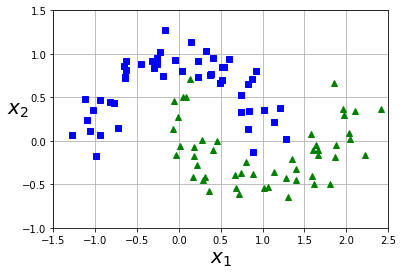

In [10]:
# Lets see what the Moons dataset looks like.
X,y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X,y,axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

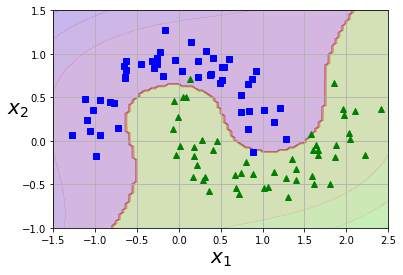

In [12]:
#Lets see how it did.
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [13]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [14]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [15]:
X.shape, y.shape

((100, 2), (100,))

**Kernel Trick**: Attempt to move data into a higher dimensional space, in which it perhaps can become linearly separable.

## SVM Regression
To use SVM for regression just flip the object. Instead of finding a wide street that splits the data classes, find one that fits as many instances as possible on the street. while limiting margin violations (instances off the street)

Use the sklearn `SVR` class.